# Dwa zbiory danych będą wykorzystane: jeden do uczenia i walidacji, a drugi do testów

Text(0.5, 1.0, 'Charakterystyka F2(L31)')

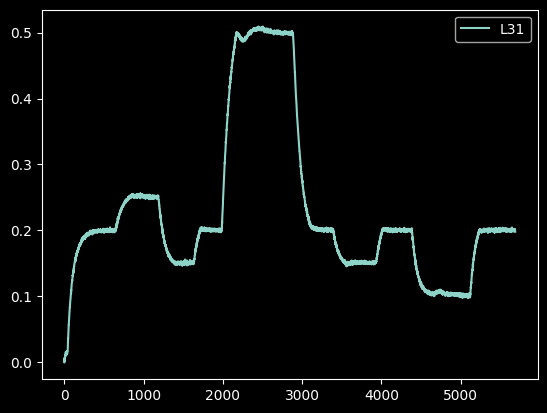

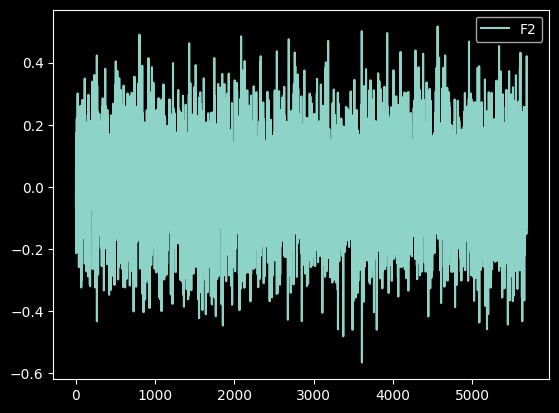

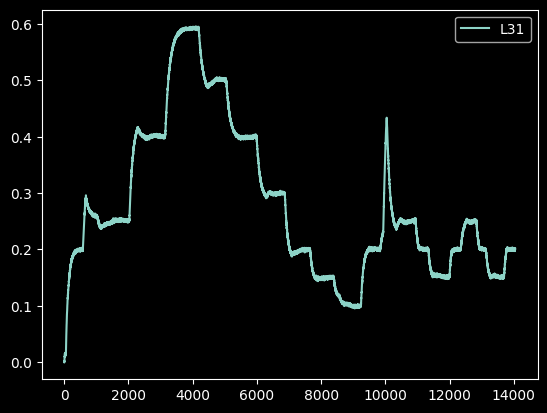

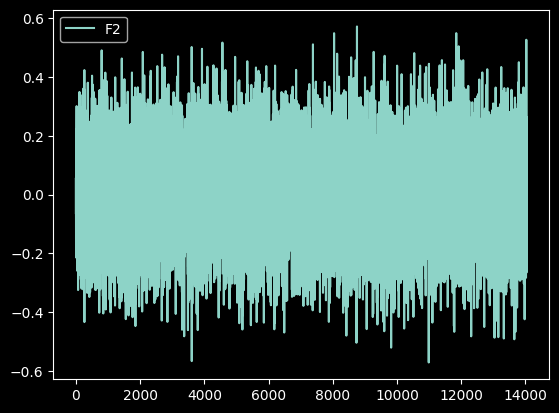

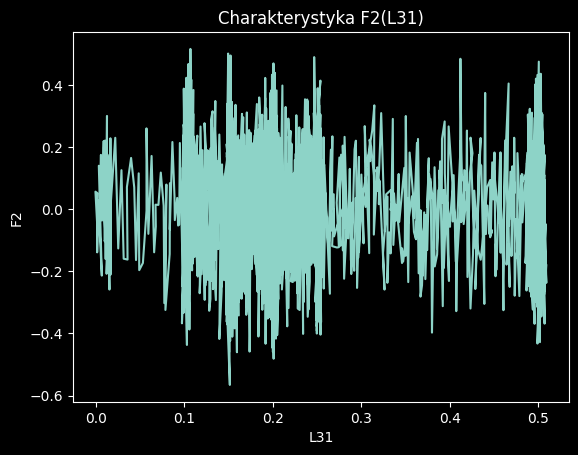

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

usecols = ["L31", "F2"]
dataset_train = pd.read_csv('Dane_AI_czlowiek/CV1uczacy.csv', sep=',', usecols=usecols, index_col=False)
dataset_test = pd.read_csv('Dane_AI_czlowiek/CV1testowy.csv', sep=',', usecols=usecols, index_col=False)

dataset_train.head()
dataset_test.head()

plt.figure()
plt.plot(dataset_test['L31'], label='L31')
plt.legend()
plt.figure()
plt.plot(dataset_test['F2'], label='F2')
plt.legend()

plt.figure()
plt.plot(dataset_train['L31'], label='L31')
plt.legend()
plt.figure()
plt.plot(dataset_train['F2'], label='F2')
plt.legend()

plt.figure()
plt.plot(dataset_test['L31'], dataset_test['F2'])
plt.xlabel('L31')
plt.ylabel('F2')
plt.title('Charakterystyka F2(L31)')

# Przygotowanie listy cech i wzorcowych wyjść dla danych uczących i testowych

In [6]:
train_features = dataset_train.copy()
train_labels = train_features.pop('F2')

test_features = dataset_test.copy()
test_labels = test_features.pop('F2')

# Definicja modelu i uczenie

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Narmalizacja
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

# Warstwa wejść i konstrukcja modelu
input_layer = keras.layers.Input(train_features.shape[1:])
model = keras.Sequential([
      input_layer,
      layers.Dense(2, activation='tanh'),
      layers.Dense(1)
  ])

# Kompilacja modelu
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.02))

# Proce uczenia
history = model.fit(
    train_features,
    train_labels,
    epochs=20,
    validation_split = 0.2)

# Zapis modelu
model.save('../output/F2_L3.keras')

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1207 - val_loss: 0.1213
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1211 - val_loss: 0.1221
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1208 - val_loss: 0.1246
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1211 - val_loss: 0.1222
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1213 - val_loss: 0.1218
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1212 - val_loss: 0.1212
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1208 - val_loss: 0.1231
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1211 - val_loss: 0.1253
Epoch 9/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1211 - val_loss: 0.1223
Epoch 10/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1205 - val_loss: 0.1212
Epoch 11/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1211 - val_loss: 0.1212
Epoch 12/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

# Sprawdzenie

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9524\480539930.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9524\480539930.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Charakterystyka F2(L3)')

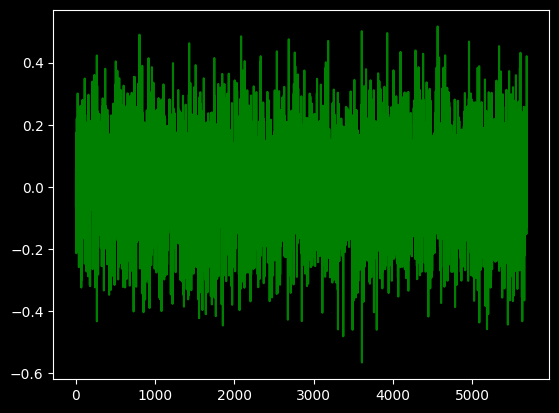

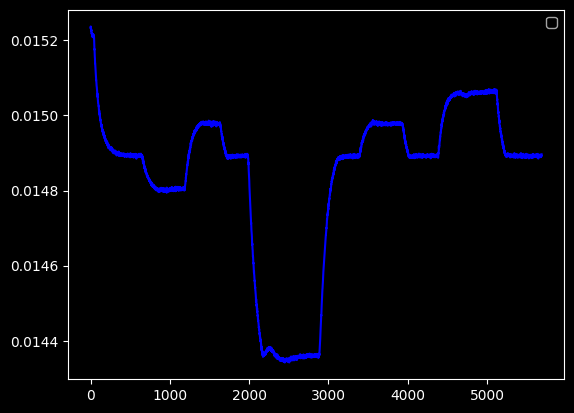

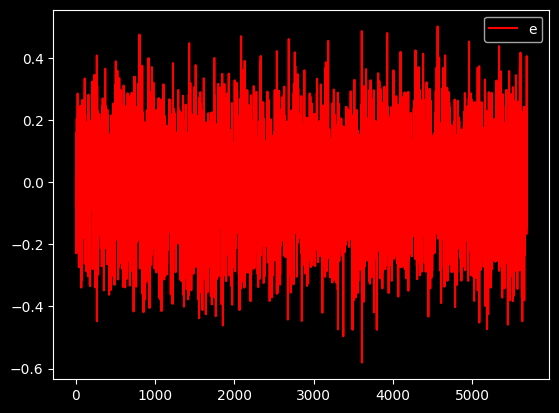

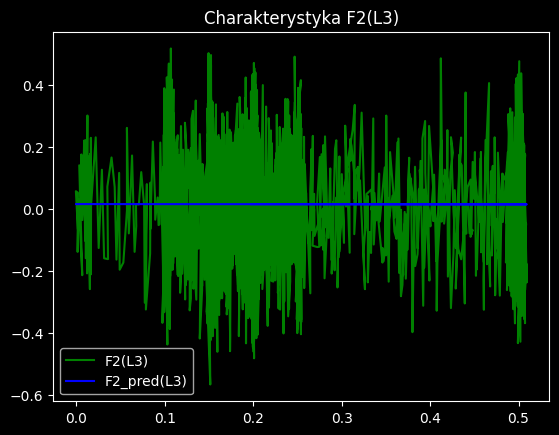

In [10]:
# Wczytanie modelu z pliku
model_saved = keras.models.load_model('../output/F2_L3.keras')

# Predykcja
y = model_saved.predict(test_features)

y_ref = test_labels.array
e = [a - b for a, b in zip(y_ref, y)]
plt.figure()
plt.plot(y_ref, label='F2', color='g')
plt.figure()
plt.legend()
plt.plot(y, label='F3_pred', color='b')
plt.figure()
plt.legend()
plt.plot(e, label='e', color='r')
plt.legend()

plt.figure()
plt.plot(test_features, test_labels, label='F2(L3)', color='g')
plt.plot(test_features, y, label='F2_pred(L3)', color='b')
plt.legend()
plt.title('Charakterystyka F2(L3)')